In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV 

# EXERCISE 1

# read data from iris_teach_2.csv
df_iris = pd.read_csv('iris_teach_2.csv')

print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
148                6.7               3.0                5.2               2.3   
149                6.3               2.5                5.0               1.9   
150                6.5               3.0                5.2               2.0   
151                6.2               3.4                5.4               2.3   
152                5.9               3.0                5.1               1.8   

     iris_name  
0       se

In [53]:
# EXERCISE 2

df_iris.isnull().sum()
# df_iris.sum(axis=1)

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64

In [54]:
# EXERCISE 3

df_iris.dropna(inplace=True)
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
148                6.7               3.0                5.2               2.3   
149                6.3               2.5                5.0               1.9   
150                6.5               3.0                5.2               2.0   
151                6.2               3.4                5.4               2.3   
152                5.9               3.0                5.1               1.8   

     iris_name  
0       se

In [55]:
# EXERCISE 4

# X features Y target
x = df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df_iris['iris_name']

print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
148                6.7               3.0                5.2               2.3
149                6.3               2.5                5.0               1.9
150                6.5               3.0                5.2               2.0
151                6.2               3.4                5.4               2.3
152                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [58]:
# EXERCISE 5

label_encoded = preprocessing.LabelEncoder()
label_encoded.fit(y)
# y_encoded.classes_
y_encoded = label_encoded.transform(y)

# y_encoded.inverse_transform(y)

print(y.head())
print(y_encoded)

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: iris_name, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Accuracy: 0.97
Best hyperparameters: {'max_depth': 3}


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

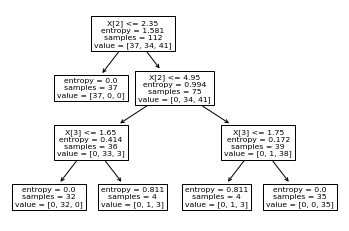

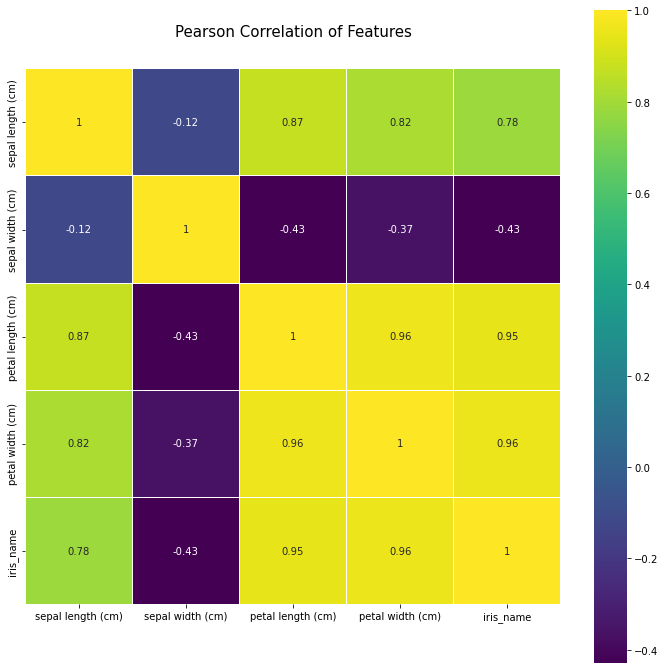

In [59]:
# EXERCISE 6

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(x_train, y_train)

# Make predictions on the test set 
y_pred = tree_clf.predict(x_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

# Visualize the decision tree 
plot_tree(tree_clf)

# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(x_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(x_train, y_train)

# Visualize the decision tree 
plot_tree(tree_clf_tuned)

df_clean_iris_set = x.copy()
df_clean_iris_set['iris_name']=y_encoded
df_clean_iris_set.head()

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

     sepal length (cm)  sepal width (cm)  petal length (cm)
0                  5.1               3.5                1.4
1                  4.9               3.0                1.4
2                  4.7               3.2                1.3
3                  4.6               3.1                1.5
4                  5.0               3.6                1.4
..                 ...               ...                ...
148                6.7               3.0                5.2
149                6.3               2.5                5.0
150                6.5               3.0                5.2
151                6.2               3.4                5.4
152                5.9               3.0                5.1

[150 rows x 3 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
148    virginica
149    virginica
150    virginica
151    virginica
152    virginica
Name: iris_name, Length: 150, dtype: object
Accuracy: 0.92
Best hyper

[Text(148.8, 195.696, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(186.0, 152.208, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 4.95\nentropy = 0.206\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(74.4, 65.232, 'X[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(260.40000000000003, 108.72, 'X[2] <= 5.15\nentropy = 0.562\nsamples = 38\nvalue = [0, 5, 33]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 6.5\nentropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]'),
 Text(186.0, 21.744, 'entropy = 0.811\nsamples = 12\nvalue = [0, 3, 9]'),
 Text(260.40000000000003, 21.744, 'entropy =

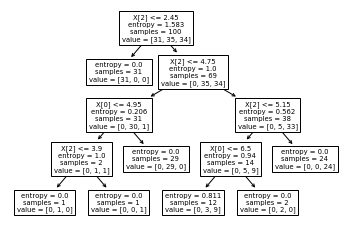

In [61]:
# EXERCISE 7 + 8

df_iris = pd.read_csv('iris_teach_2.csv')

df_iris.dropna(inplace=True)

# X features Y target
x = df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)']]
y = df_iris['iris_name']

print(x)
print(y)

label_encoded = preprocessing.LabelEncoder()
label_encoded.fit(y)
# y_encoded.classes_
y_encoded = label_encoded.transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(x_train, y_train)

# Make predictions on the test set 
y_pred = tree_clf.predict(x_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

# Visualize the decision tree 
plot_tree(tree_clf)

# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(x_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(x_train, y_train)

plot_tree(tree_clf_tuned)